# Initial Things

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df=pd.read_csv("/content/drive/MyDrive/weather.csv",delimiter=',')

In [25]:
df.head(5)

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,target
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0,0
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0,0
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1,1
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0,1
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0,0


In [26]:
df.isnull().values.any()

False

In [27]:
np.any(np.isnan(df))

False

In [28]:
np.isinf(df).values.sum()

0

In [29]:
df.shape

(18159, 9)

In [30]:
len(df)

18159

In [31]:
X=df.iloc[:,0:7]
X.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0


In [32]:
Y=df.iloc[:,-1]
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: target, dtype: int64

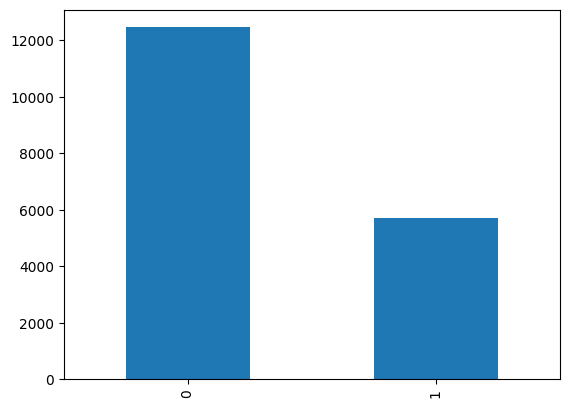

In [33]:
df['target'].value_counts().plot(kind='bar');

In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [43]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [15]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [16]:
pip install deepchecks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from deepchecks.suites import full_suite
import deepchecks

In [47]:
ds_train = deepchecks.Dataset(df=x_train,label=y_train,cat_features=[])
ds_test = deepchecks.Dataset(df=x_test,label=y_test,cat_features=[])

In [48]:
# Create the suite
fsuite = full_suite()

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps=[('sc',StandardScaler()),('rf',RandomForestClassifier(n_estimators = 75, criterion = 'entropy',max_depth=15))])

In [51]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=75))])

In [52]:
results = fsuite.run(train_dataset=ds_train,test_dataset=ds_test,model=pipe_lr)

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 19 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 19 seconds


In [53]:
results

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

In [54]:
from deepchecks.checks import TrainTestFeatureDrift
check = TrainTestFeatureDrift()

/usr/local/lib/python3.8/dist-packages/deepchecks/checks.py:21: DeprecationWarning:

Ability to import tabular checks from the `deepchecks.checks` is deprecated, please import from `deepchecks.tabular.checks` instead



In [55]:
result = check.run(train_dataset=ds_train, test_dataset=ds_test, model=pipe_lr)

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 18 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 18 seconds


In [56]:
result

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Feature Drift

In [57]:
### Label Drift
from deepchecks.checks import TrainTestLabelDrift
lcheck = TrainTestLabelDrift()
lresult = lcheck.run(train_dataset=ds_train, test_dataset=ds_test)

deepchecks - WARNING - Due to the small number of unique labels task type was inferred as binary classification in spite of the label column is of type integer. Initialize your Dataset with either label_type="binary}" or label_type="regression" to resolve this warning.


In [58]:
lresult

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Label Drift

# Auto Sklearn

In [ ]:
pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import autosklearn.classification
import sklearn
import matplotlib.pyplot as plt

In [ ]:
cls = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
)
cls.fit(X_Train, Y_Train, X_Test, Y_Test)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=30, time_left_for_this_task=120)

In [ ]:
predictions = cls.predict(X_Test)
print("Accuracy score", sklearn.metrics.accuracy_score(Y_Test, predictions))

Accuracy score 0.7958149779735683


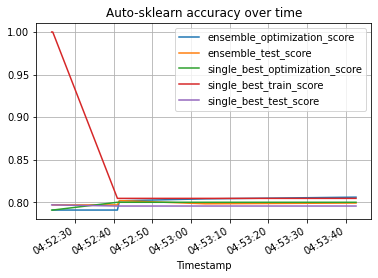

In [ ]:
############################################################################
# Plot the ensemble performance
# ===================================
# The *performance_over_time_* attribute returns a pandas dataframe, which can
# be directly used for plotting

poT = cls.performance_over_time_
poT.plot(
    x="Timestamp",
    kind="line",
    legend=True,
    title="Auto-sklearn accuracy over time",
    grid=True,
)
plt.show()

# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 75, criterion = 'entropy',max_depth=15,warm_start=True)


In [ ]:
rf.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', warm_start=True)

In [ ]:
Y_Pred = rf.predict(X_Test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

[[2821  313]
 [ 630  776]]


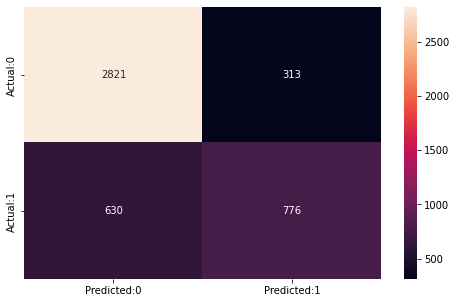

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d')

In [ ]:
#Accuracy
import sklearn
rf_acc=sklearn.metrics.accuracy_score(Y_Test, Y_Pred)
print(rf_acc)

0.7922907488986785


In [ ]:
Y_Pred = rf.predict(X_Test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

[[2838  296]
 [ 610  796]]


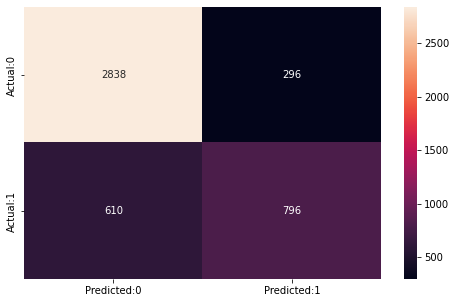

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d')

In [ ]:
#Accuracy
import sklearn
rf_acc=sklearn.metrics.accuracy_score(Y_Test, Y_Pred)
print(rf_acc)

0.8004405286343612


# Cat Boost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import catboost as ctb
CBC = ctb.CatBoostClassifier(depth= 10, iterations= 100, learning_rate= 0.04)
CBC.fit(X_Train, Y_Train)

0:	learn: 0.6807728	total: 90.2ms	remaining: 8.93s
1:	learn: 0.6689801	total: 119ms	remaining: 5.83s
2:	learn: 0.6582549	total: 140ms	remaining: 4.53s
3:	learn: 0.6477723	total: 166ms	remaining: 3.97s
4:	learn: 0.6379927	total: 187ms	remaining: 3.55s
5:	learn: 0.6289107	total: 208ms	remaining: 3.25s
6:	learn: 0.6200503	total: 228ms	remaining: 3.03s
7:	learn: 0.6120538	total: 249ms	remaining: 2.86s
8:	learn: 0.6047076	total: 270ms	remaining: 2.73s
9:	learn: 0.5968188	total: 296ms	remaining: 2.66s
10:	learn: 0.5905557	total: 316ms	remaining: 2.56s
11:	learn: 0.5835278	total: 342ms	remaining: 2.5s
12:	learn: 0.5774886	total: 364ms	remaining: 2.44s
13:	learn: 0.5715412	total: 384ms	remaining: 2.36s
14:	learn: 0.5655690	total: 406ms	remaining: 2.3s
15:	learn: 0.5596520	total: 428ms	remaining: 2.24s
16:	learn: 0.5545730	total: 448ms	remaining: 2.19s
17:	learn: 0.5490346	total: 476ms	remaining: 2.17s
18:	learn: 0.5439949	total: 511ms	remaining: 2.18s
19:	learn: 0.5395418	total: 533ms	remainin

# XG Boost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_Train, Y_Train)

XGBClassifier()

# **Stacked model**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
('Random forest',rf),
('CAt Boost',CBC),
('XG Boost',xg) ]

stack_model = StackingClassifier(
    estimators=estimator_list
)
# Train stacked model
stack_model.fit(X_Train,Y_Train)

0:	learn: 0.6807728	total: 23.6ms	remaining: 2.33s
1:	learn: 0.6689801	total: 44.9ms	remaining: 2.2s
2:	learn: 0.6582549	total: 65.4ms	remaining: 2.11s
3:	learn: 0.6477723	total: 86.1ms	remaining: 2.07s
4:	learn: 0.6379927	total: 107ms	remaining: 2.04s
5:	learn: 0.6289107	total: 131ms	remaining: 2.05s
6:	learn: 0.6200503	total: 160ms	remaining: 2.13s
7:	learn: 0.6120538	total: 181ms	remaining: 2.08s
8:	learn: 0.6047076	total: 201ms	remaining: 2.03s
9:	learn: 0.5968188	total: 222ms	remaining: 2s
10:	learn: 0.5905557	total: 244ms	remaining: 1.97s
11:	learn: 0.5835278	total: 264ms	remaining: 1.94s
12:	learn: 0.5774886	total: 285ms	remaining: 1.91s
13:	learn: 0.5715412	total: 306ms	remaining: 1.88s
14:	learn: 0.5655690	total: 334ms	remaining: 1.89s
15:	learn: 0.5596520	total: 355ms	remaining: 1.86s
16:	learn: 0.5545730	total: 376ms	remaining: 1.83s
17:	learn: 0.5490346	total: 397ms	remaining: 1.81s
18:	learn: 0.5439949	total: 418ms	remaining: 1.78s
19:	learn: 0.5395418	total: 444ms	remaini

StackingClassifier(estimators=[('Random forest',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=15,
                                                       n_estimators=75)),
                               ('CAt Boost',
                                <catboost.core.CatBoostClassifier object at 0x7fe8259cee50>),
                               ('XG Boost', XGBClassifier())])

In [ ]:
Y_Pred = stack_model.predict(X_Test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

[[2823  311]
 [ 605  801]]


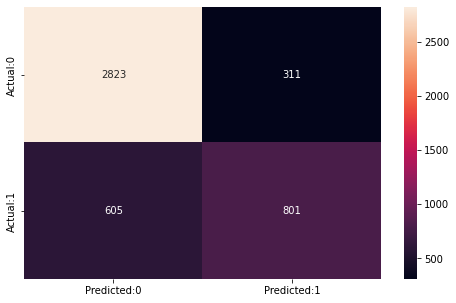

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d')

In [ ]:
#Accuracy
import sklearn
rf_acc=sklearn.metrics.accuracy_score(Y_Test, Y_Pred)
print(rf_acc)

0.798237885462555


# C

In [ ]:
 !pip install creme

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 20.2 MB/s 
  Created wheel for mmh3: filename=mmh3-2.5.1-cp38-cp38-linux_x86_64.whl size=38281 sha256=30cd95ea1b8fa7183c44f4008de9f646f16d60322225d6d1ac5c3565b596d268
  Stored in directory: /root/.cache/pip/wheels/35/b5/13/3f3f3504a7198c89112fc3340fa1ba614e9499c41655d3beab
Successfully built mmh3


In [ ]:
from creme import datasets
A_b = datasets.Phishing()
print(A_b)

Phishing dataset

              Task  Binary classification                                                
 Number of samples  1,250                                                                
Number of features  9                                                                    
            Sparse  False                                                                
              Path  /usr/local/lib/python3.8/dist-packages/creme/datasets/phishing.csv.gz


# Drift Detection using ADWIN

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [ ]:
import re

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install -U scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skmultiflow.drift_detection.adwin import ADWIN
adwin = ADWIN()

In [ ]:
data_stream = df['target']

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

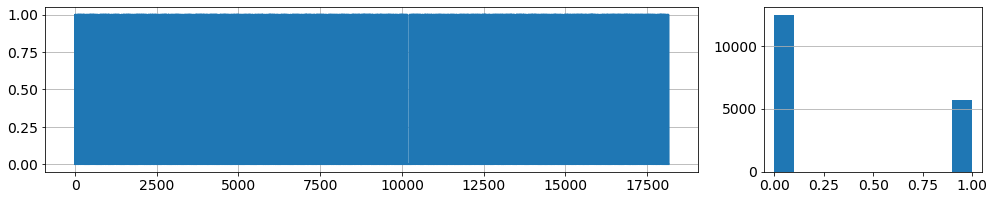

In [ ]:
def plot_data(data_stream, drifts=None):
    fig = plt.figure(figsize=(14,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(data_stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(data_stream, label=r'$data_stream$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(data_stream)

In [ ]:
!pip install river

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from river.compose import Pipeline

In [ ]:
pipe_nb = Pipeline(('rf',RandomForestClassifier(n_estimators = 75, criterion = 'entropy',max_depth=15)))

In [ ]:
  # Get steps
pipe_nb.steps

OrderedDict([('rf',
              RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=75))])

In [ ]:
X_Train[1]

array([ 0.90218595,  0.98822844,  0.06643262,  0.82304418, -0.69481494,
       -0.55723324,  0.81338442])

In [ ]:
pipe_nb.fit_one(X_Train[1],Y_Train[1])

AttributeError: ignored

In [ ]:
rf.fit(X_Test,Y_Test)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=75,
                       warm_start=True)

In [ ]:
import river
from river import drift

adwin = drift.ADWIN()
drifts = []

for i, val in enumerate(data_stream):
  _ = adwin.update(val)
  if adwin.drift_detected:
    print(f"Change detected at index {i}, input value: {val}")
    
    rf.fit()


plot_data(data_stream, drifts)

ValueError: ignored

In [ ]:
pipe_lr.score(X_Test,Y_Test)

In [ ]:
data_stream2 = df["target"]

In [ ]:
def plot_data(data_stream2, drifts=None):
    fig = plt.figure(figsize=(20,6), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(data_stream2, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(data_stream2, label=r'$data_stream2$')
    if drifts is not None:
        for adwin.drift_detected in drifts:
            ax1.axvline(adwin.drift_detected, color='red')
    plt.show()

plot_data(data_stream2)

In [ ]:
from river import drift

adwin = drift.ADWIN()
drifts = []

for i, val in enumerate(data_stream):
  _ = adwin.update(val)
  if adwin.drift_detected:
    print(f"Change detected at index {i}, input value: {val}")

plot_data(data_stream2, drifts)

# Retraining without feature selection

Making multiple macro datasets

In [ ]:
def splitDataFrameIntoSmaller(df, chunkSize): #10 for default 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
    return listOfDf

df_split = splitDataFrameIntoSmaller(df, chunkSize = 363)

In [ ]:
def initial(df_split):
  X=df_split.iloc[:,0:7]
  Y=df_split.iloc[:,-1]
  return X, Y

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
grid = {'n_estimators': [70,75,80,85,90,95,100],
        'max_depth': [15,20,30,40],
        "criterion":['gini','entropy']}
clf = RandomForestClassifier()
grid = GridSearchCV(clf, grid, cv=3, scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 70}
Accuracy:0.7957266910790121


In [ ]:
def generate_rf(X_train, y_train):
    rf = RandomForestClassifier(**grid.best_params_)
    rf.fit(X_train, y_train)
    return rf

def combine_rfs(rf_a, rf_b):
    rf_a.estimators_ += rf_b.estimators_
    rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a

In [ ]:
rf = R

In [ ]:
df_split[0].isnull().values.any()

False

In [ ]:
np.any(np.isnan(df_split[0]))

False

In [ ]:
from sklearn.preprocessing import StandardScaler
import sklearn
for i in range(0,len(df_split)-1):
  X_Train,Y_Train=initial(df_split[i])
  X_Test,Y_Test=initial(df_split[i+1])
  sc_X = StandardScaler()
  X_Train = sc_X.fit_transform(X_Train)
  X_Test = sc_X.transform(X_Test)
  X_Train = pd.DataFrame(X_Train)
  X_Test = pd.DataFrame(X_Test)
  Y_Train = pd.Series(Y_Train)
  Y_Test = pd.Series(Y_Test)
  rfs=generate_rf(X_Train,Y_Train)
  rf = combine_rfs(rf,rfs)
  Y_Pred = rf.predict(X_Test)
  rf_acc=sklearn.metrics.accuracy_score(Y_Test, Y_Pred)
  print(i)
  if(rf_acc*100>=99.9):
    break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
print(rf_acc)

0.8888888888888888


In [ ]:
y_pred=rf.predict(x_test)
rf_acc=sklearn.metrics.accuracy_score(y_test, y_pred)
print(rf_acc)

0.7759911894273128


# Feature Selection

In [ ]:
pip install zoofs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 635 kB/s 
  Created wheel for zoofs: filename=zoofs-0.1.26-py3-none-any.whl size=23620 sha256=e23464ebfa4d40892eeb75a096708852c3503a4058edb3b68fbcfb597991ca52
  Stored in directory: /root/.cache/pip/wheels/16/ab/cb/e3265f2dbd9704662dbc25f9a438f6b7b798443dd694542c10
Successfully built zoofs
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
from zoofs import ParticleSwarmOptimization

In [ ]:

from sklearn.metrics import log_loss
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value ! 
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):      
    model.fit(X_train,y_train)  
    P=log_loss(y_valid,model.predict_proba(X_valid))
    return P
    
# import an algorithm !  
from zoofs import ParticleSwarmOptimization
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=10,
                                       population_size=20,minimize=True)
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()                                       
# fit the algorithm
algo_object.fit(lgb_model,x_train, y_train, x_test, y_test,verbose=True)
#plot your results


 [ 2022-12-21 18:43:50,721 ] Finished iteration #0 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:43:51,517 ] Finished iteration #1 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:43:52,334 ] Finished iteration #2 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:43:52,337 ] 1 individuals went zero
 [ 2022-12-21 18:43:53,130 ] Finished iteration #3 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:43:53,812 ] Finished iteration #4 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:43:54,510 ] Finished iteration #5 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:43:55,199 ] Finished iteration #6 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:43:55,

['feat_2', 'feat_3', 'feat_5']

In [ ]:
from sklearn.metrics import log_loss
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value ! 
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):      
    model.fit(X_train,y_train)  
    P=log_loss(y_valid,model.predict_proba(X_valid))
    return P
    
# import an algorithm !  
from zoofs import ParticleSwarmOptimization
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=10,
                                       population_size=20,minimize=True)
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()                                       
# fit the algorithm
algo_object.fit(lgb_model,x_train, y_train, x_test, y_test,verbose=True)
#plot your results

 [ 2022-12-21 18:44:15,837 ] Finished iteration #0 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:44:16,730 ] Finished iteration #1 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:44:17,508 ] Finished iteration #2 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:44:18,333 ] Finished iteration #3 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:44:18,940 ] Finished iteration #4 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:44:19,563 ] Finished iteration #5 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:44:20,182 ] Finished iteration #6 with objective value 0.618922896607874. Current best value is 0.618922896607874 
 [ 2022-12-21 18:44:20,602 ] Finished iteration #7 with objective value 0.61

['feat_2', 'feat_4', 'feat_5', 'feat_7', 'feat_8', 'target']

# Retraining

Making multiple macro datasets

In [ ]:
df_pso=df[['feat_2', 'feat_4', 'feat_5', 'feat_7', 'feat_8', 'target']]

In [ ]:
X=df_pso.iloc[:,0:8]
Y=df_pso.iloc[:,-1]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [ ]:
def splitDataFrameIntoSmaller(df, chunkSize): #10 for default 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
    return listOfDf

df_split = splitDataFrameIntoSmaller(df_pso, chunkSize = 363)

In [ ]:
def initial(df_split):
  X=df_split.iloc[:,0:7]
  Y=df_split.iloc[:,-1]
  return X, Y

In [ ]:
df_split[0].isnull().values.any()

False

In [ ]:
np.any(np.isnan(df_split[0]))

False

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
grid = {'n_estimators': [70,75,80,85,90,95,100],
        'max_depth': [15,20,30,40],
        "criterion":['gini','entropy']}
clf = RandomForestClassifier()
grid = GridSearchCV(clf, grid, cv=3, scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 70}
Accuracy:0.7957266910790121


In [ ]:
def generate_rf(X_train, y_train):
    rf = RandomForestClassifier(**grid.best_params_)
    rf.fit(X_train, y_train)
    return rf

def combine_rfs(rf_a, rf_b):
    rf_a.estimators_ += rf_b.estimators_
    rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a

In [ ]:
from sklearn.preprocessing import StandardScaler
import sklearn
for i in range(0,len(df_split)-1):
  X_Train,Y_Train=initial(df_split[i])
  X_Test,Y_Test=initial(df_split[i+1])
  sc_X = StandardScaler()
  X_Train = sc_X.fit_transform(X_Train)
  X_Test = sc_X.transform(X_Test)
  X_Train = pd.DataFrame(X_Train)
  X_Test = pd.DataFrame(X_Test)
  Y_Train = pd.Series(Y_Train)
  Y_Test = pd.Series(Y_Test)
  rf.fit(X_Train,Y_Train)
  Y_Pred = rf.predict(X_Test)
  rf_acc=sklearn.metrics.accuracy_score(Y_Test, Y_Pred)
  if(rf_acc*100>=99.9):
    break

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [ ]:
print(rf_acc)

1.0


In [ ]:
y_pred=rf.predict(x_test)
rf_acc=sklearn.metrics.accuracy_score(y_test, y_pred)
print(rf_acc)

1.0
